In [1]:
import pandas as pd
import numpy as np

## Data Cleaning and Preparation

In [2]:
df = pd.read_csv('fraud_oracle.csv')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
df.shape

(15420, 33)

In [7]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [8]:
df.isnull().sum() 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [9]:
pd.set_option('display.max_columns', None)  # Set the option to display all columns
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Numerically Encode **Age** and **Sex**

In [10]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1})

In [11]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Numerically encode **Month** and **Day of Week**

In [12]:
df['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [13]:
df = df[df['MonthClaimed'] != '0']

In [14]:
df['Month'] = pd.to_datetime(df['Month'], format='%b')
df['Month'] = df['Month'].dt.month

In [15]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [16]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

In [17]:
df['MonthClaimed'] = pd.to_datetime(df['MonthClaimed'], format='%b')
df['MonthClaimed'] = df['MonthClaimed'].dt.month

In [18]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].map(day_mapping)

In [19]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,Honda,Urban,1,1,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,2,Honda,Urban,0,1,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,4,Honda,Urban,3,11,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,5,Toyota,Rural,4,7,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,0,Honda,Urban,1,2,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Numerically Encode **Make** of The Car

In [20]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

### Numerically Encode Every Other Column the same way



In [22]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,6,Urban,1,1,1,1,0.0,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,2,6,Urban,0,1,4,0,0.0,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,4,6,Urban,3,11,2,0,1.0,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,5,17,Rural,4,7,1,0,1.0,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,0,6,Urban,1,2,2,1,0.0,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [23]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [25]:
categorical_columns

['AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [26]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['AccidentArea',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [27]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,6,1,1,1,1,1,0.0,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
1,1,3,2,6,1,0,1,4,0,0.0,34,0,4,1,5,0,2,15,400,4,3,2,3,4,4,1,0,0,3,3,0,1994,1
2,10,5,4,6,1,3,11,2,0,1.0,47,0,4,1,5,0,3,7,400,3,3,2,0,5,6,0,0,0,3,3,0,1994,1
3,6,2,5,17,0,4,7,1,0,1.0,65,1,2,1,0,0,4,4,400,2,3,2,0,6,7,1,0,0,2,3,0,1994,2
4,1,5,0,6,1,1,2,2,1,0.0,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1


In [28]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

### Split X and y variables

In [29]:
y = df['FraudFound_P']
X = df.drop('FraudFound_P', axis = 1)

### Standardize the data

In [30]:
X.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15308.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.00000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000,15419.000000
mean,6.391660,2.788637,2.808029,10.114858,0.896426,1.828394,6.355730,2.694079,0.156949,0.694082,39.858292,0.271743,1.260717,0.398210,1.291588,7710.90168,8.482846,407.704780,2.487840,2.990920,1.991374,1.463000,4.799144,4.892211,0.027758,0.005642,0.015630,2.003308,2.888514,0.098839,1994.866528,1.036384
std,3.473131,1.287611,1.979329,5.282987,0.304716,1.453476,3.465167,1.259082,0.363765,0.460810,13.488996,0.444872,1.190994,0.538864,1.837352,4451.37980,4.599798,43.952379,1.119482,0.167143,0.125762,1.129839,1.140106,1.395396,0.164284,0.074906,0.124043,1.110652,0.451095,0.383484,0.803309,0.782336
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3856.50000,5.000000,400.000000,1.000000,3.000000,2.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,1.000000,2.000000,6.000000,3.000000,0.000000,1.000000,38.000000,0.000000,1.000000,0.000000,0.000000,7711.00000,8.000000,400.000000,2.000000,3.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000
75%,9.000000,4.000000,4.000000,13.000000,1.000000,3.000000,9.000000,4.000000,0.000000,1.000000,48.000000,1.000000,2.000000,1.000000,1.000000,11565.50000,12.000000,400.000000,3.000000,3.000000,2.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000
max,12.000000,5.000000,6.000000,18.000000,1.000000,6.000000,12.000000,5.000000,1.000000,1.000000,80.000000,1.000000,8.000000,2.000000,5.000000,15420.00000,16.000000,700.000000,4.000000,4.000000,2.000000,3.000000,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000


## Exploratory Data Analysis (EDA)

### Data Summary

In [ ]:
# Check the number of rows and columns
print(df.shape)

# View the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics for numerical variables
print(df.describe())

## Visualization

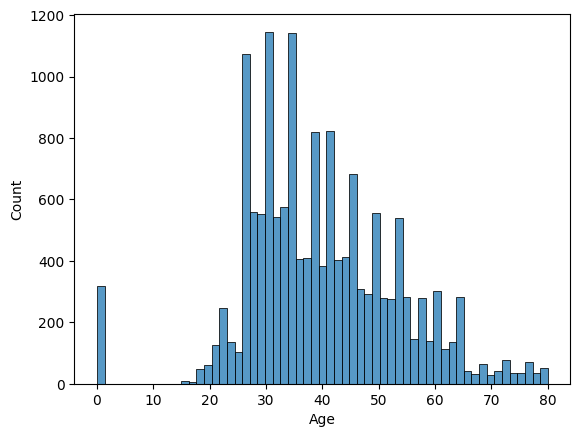

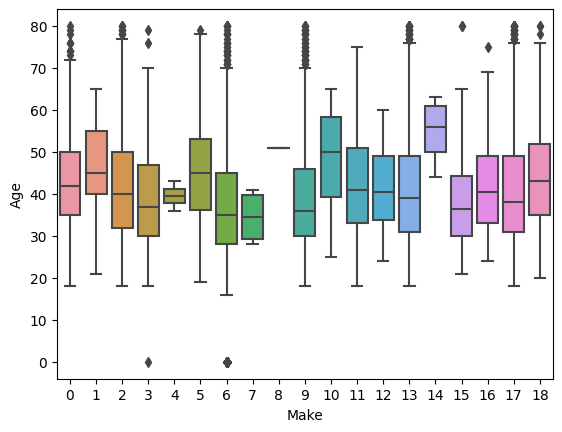

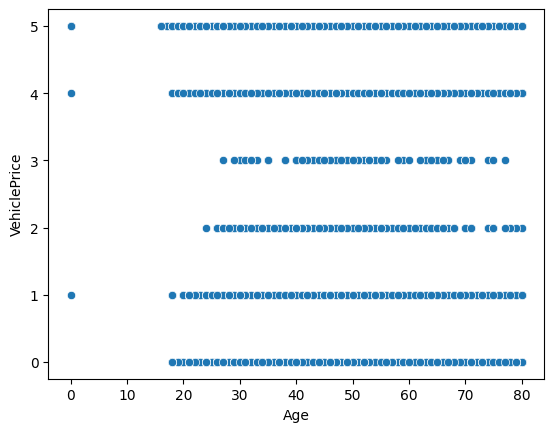

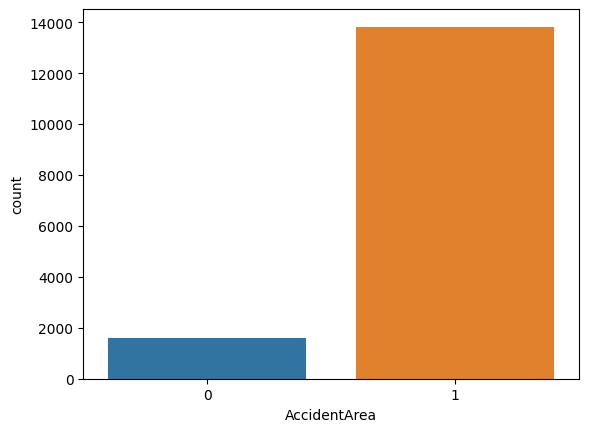

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a numerical variable
sns.histplot(df['Age'])
plt.show()

# Box plot of a numerical variable
sns.boxplot(x='Make', y='Age', data=df)
plt.show()

# Scatter plot of two numerical variables
sns.scatterplot(x='Age', y='VehiclePrice', data=df)
plt.show()

# Bar plot of a categorical variable
sns.countplot(x='AccidentArea', data=df)
plt.show()

### Corelation Analysis

In [33]:
df_og = pd.read_csv('fraud_oracle.csv')

<ipython-input-34-c123fda4d527>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_og.corr()


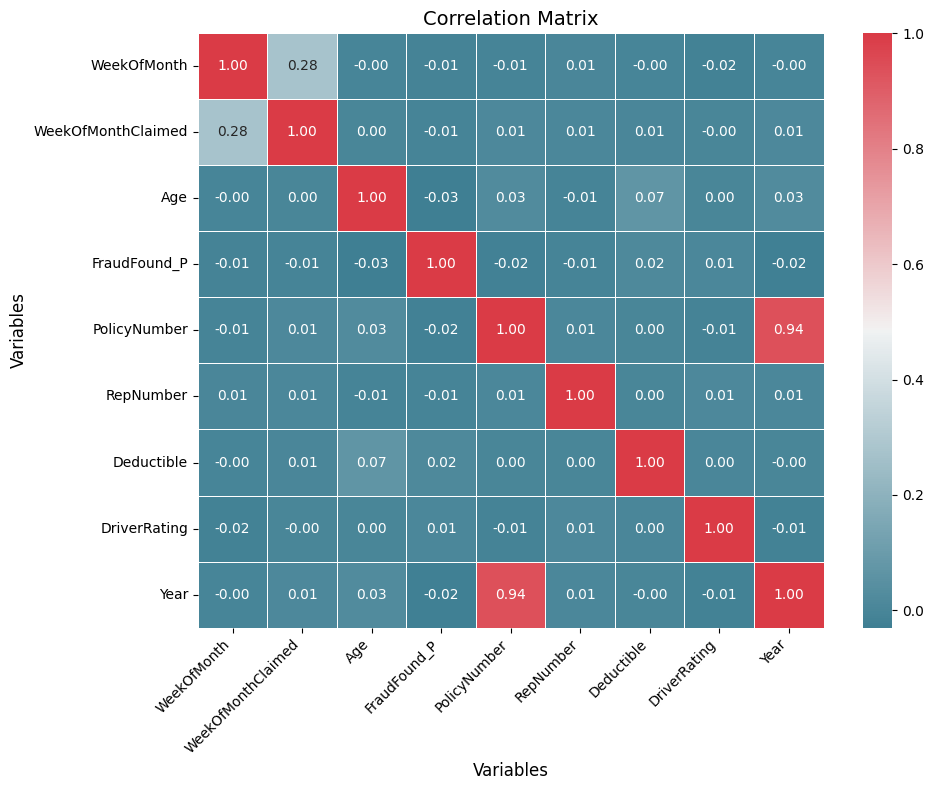

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_og.corr()

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap with custom color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title("Correlation Matrix", fontsize=14)
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust the plot layout to prevent cutoff of labels
plt.tight_layout()

# Show the plot
plt.show()


## Fraud Indicators Identification

In [35]:
# Drop rows with NaN values
df.dropna(axis=0, inplace=True)

In [36]:
from sklearn.ensemble import IsolationForest

# Separate the features and target variable
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the expected fraud rate
model.fit(X)

# Predict anomalies
anomaly_scores = model.decision_function(X)
predictions = model.predict(X)

# Identify the fraud cases
fraud_indices = [index for index, pred in enumerate(predictions) if pred == -1]
fraud_cases = df.iloc[fraud_indices]

# Print the fraud cases
(fraud_cases)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,2,6,1,1,1,1,1,0.0,21,0,5,1,5,0,1,12,300,1,3,2,3,1,3,0,0,0,3,0,2,1994,2
4,1,5,0,6,1,1,2,2,1,0.0,27,1,4,1,5,0,5,3,400,1,3,2,3,3,4,0,0,0,3,3,0,1994,1
13,1,5,4,6,0,2,2,1,0,0.0,0,1,1,0,5,0,14,12,400,3,3,2,3,7,0,0,0,0,3,3,0,1994,1
121,10,2,2,6,0,0,10,3,1,1.0,18,1,4,1,5,0,122,12,400,4,3,2,3,0,2,0,0,0,0,3,0,1994,1
142,2,5,0,2,1,4,3,1,0,1.0,52,0,2,1,0,0,143,10,400,4,3,2,3,6,6,0,0,1,1,3,3,1994,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,1,2,3,0,1,1,1,4,0,1.0,63,0,6,2,5,0,15215,1,400,3,3,2,3,4,7,0,0,0,1,3,0,1996,0
15239,10,4,4,2,1,0,10,5,1,1.0,31,1,0,0,5,0,15240,2,400,1,3,2,0,2,4,1,0,0,3,3,0,1996,0
15291,10,2,0,5,0,3,1,4,0,0.0,24,0,6,2,5,0,15292,8,400,3,3,2,3,2,3,0,0,0,2,3,0,1996,0
15314,1,5,5,13,1,0,1,5,1,0.0,47,0,2,1,4,0,15315,6,700,4,3,2,1,6,6,0,0,0,3,3,0,1996,2


## Normalize The Values

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features separately for train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter based on the expected fraud rate
model.fit(X_train_scaled)

# Predict anomalies on the test set
anomaly_scores = model.decision_function(X_test_scaled)
predictions = model.predict(X_test_scaled)

# Identify the fraud cases in the test set
fraud_indices = [index for index, pred in enumerate(predictions) if pred == -1]
fraud_cases = X_test.iloc[fraud_indices]

# Print the fraud cases in the test set
fraud_cases

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
6314,8,2,0,0,1,3,10,2,0,1.0,41,0,6,2,5,6315,11,400,1,3,2,3,5,5,0,0,0,0,3,2,1995,0
5712,5,4,5,17,1,2,6,1,0,0.0,65,0,0,0,4,5713,16,500,2,3,2,0,6,7,0,0,0,0,1,1,1994,0
3570,12,4,0,2,1,0,1,1,0,0.0,26,1,2,1,0,3571,10,500,2,3,2,3,5,4,0,0,0,1,1,1,1994,2
15344,2,1,2,2,0,3,2,1,0,1.0,54,0,7,2,5,15345,2,400,1,3,2,1,6,6,0,0,0,2,3,0,1996,1
102,1,4,4,5,1,0,2,1,1,1.0,37,0,0,0,5,103,14,500,2,3,2,1,4,5,1,0,0,1,3,0,1994,0
10181,12,5,3,6,1,0,1,1,0,0.0,0,0,6,2,5,10182,3,400,3,3,2,0,7,0,0,0,0,3,3,0,1995,0
11628,12,5,4,2,1,3,1,2,0,0.0,30,1,2,1,0,11629,7,500,1,3,2,0,4,4,0,0,0,3,1,0,1996,2
10506,1,1,5,17,0,3,1,3,0,1.0,48,0,0,0,4,10507,14,500,1,3,2,3,5,6,0,0,0,1,1,0,1995,0
294,1,3,0,6,1,0,1,3,0,0.0,0,0,2,1,5,295,11,400,1,3,2,1,7,0,0,0,0,3,2,1,1994,2
11920,8,1,6,6,0,4,2,2,0,0.0,0,0,2,1,5,11921,14,400,3,3,2,1,7,0,0,0,0,3,3,0,1996,2


## Model Building

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.937949052906597


In [40]:
# Reset the index of the test set
X_test.reset_index(drop=True, inplace=True)

# Create an empty list fraud_indices to store the indices of the fraud cases
fraud_indices = [index for index, pred in enumerate(y_pred) if pred == 1]

# Retrieve the fraud cases using the reset index of X_test
fraud_cases = X_test.iloc[fraud_indices]

print("Fraud Cases:")
fraud_cases

Fraud Cases:


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
756,11,2,6,13,1,0,11,3,0,1.0,35,1,0,0,0,8314,11,500,4,3,2,3,4,4,0,0,0,3,1,0,1995,0
1349,2,4,4,6,1,0,3,4,0,0.0,0,0,0,0,5,1556,10,400,2,3,2,3,7,0,1,0,0,3,3,0,1994,0
1496,12,4,6,13,1,2,12,5,0,1.0,41,1,1,0,0,4897,10,500,1,3,2,1,5,5,0,0,0,3,1,0,1994,1
2469,11,3,4,9,1,6,11,3,1,1.0,65,0,1,0,0,15410,7,400,3,3,2,2,5,7,0,0,0,0,3,0,1996,1
2856,4,4,4,6,1,1,4,4,0,0.0,0,0,0,0,5,3045,2,400,2,3,2,3,7,0,0,0,0,3,3,0,1994,0


In [45]:
fraud_cases

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
756,11,2,6,13,1,0,11,3,0,1.0,35,1,0,0,0,8314,11,500,4,3,2,3,4,4,0,0,0,3,1,0,1995,0
1349,2,4,4,6,1,0,3,4,0,0.0,0,0,0,0,5,1556,10,400,2,3,2,3,7,0,1,0,0,3,3,0,1994,0
1496,12,4,6,13,1,2,12,5,0,1.0,41,1,1,0,0,4897,10,500,1,3,2,1,5,5,0,0,0,3,1,0,1994,1
2469,11,3,4,9,1,6,11,3,1,1.0,65,0,1,0,0,15410,7,400,3,3,2,2,5,7,0,0,0,0,3,0,1996,1
2856,4,4,4,6,1,1,4,4,0,0.0,0,0,0,0,5,3045,2,400,2,3,2,3,7,0,0,0,0,3,3,0,1994,0


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = fraud_cases.corr()

corr_matrix

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,-0.542523,0.689062,0.891654,NaN,0.476374,0.997447,-1.288848e-01,0.361682,0.984374,0.890805,0.689062,0.689062,NaN,-0.984374,0.677332,3.815287e-01,0.689062,0.236439,NaN,NaN,-0.663084,-0.924299,0.917510,-0.723364,NaN,NaN,-0.361682,-0.689062,NaN,0.542523,0.689062
WeekOfMonth,-0.542523,1.000000,-0.408248,-0.541940,NaN,-0.067352,-0.542942,8.017837e-01,-0.250000,-0.612372,-0.501614,-0.408248,0.102062,NaN,0.612372,-0.613834,-3.803629e-01,-0.408248,-0.931552,NaN,NaN,-0.250000,0.791667,-0.484622,0.375000,NaN,NaN,0.250000,0.408248,NaN,-0.687500,0.102062
DayOfWeek,0.689062,-0.408248,1.000000,0.937043,NaN,-0.293294,0.696631,2.182179e-01,-0.408248,0.666667,0.318551,1.000000,0.166667,NaN,-0.666667,-0.006443,6.211300e-01,1.000000,0.080064,NaN,NaN,-0.408248,-0.748455,0.381037,-0.408248,NaN,NaN,0.408248,-1.000000,NaN,-0.102062,0.166667
Make,0.891654,-0.541940,0.937043,1.000000,NaN,0.040079,0.900035,3.407991e-02,-0.063758,0.884985,0.628467,0.937043,0.416463,NaN,-0.884985,0.333043,6.208269e-01,0.937043,0.200063,NaN,NaN,-0.541940,-0.913860,0.677475,-0.541940,NaN,NaN,0.063758,-0.937043,NaN,0.223152,0.416463
AccidentArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,0.476374,-0.067352,-0.293294,0.040079,NaN,1.000000,0.469002,-2.640084e-01,0.942928,0.476603,0.780087,-0.293294,0.806559,NaN,-0.476603,0.828797,-2.186086e-01,-0.293294,0.035223,NaN,NaN,-0.516365,-0.254441,0.747905,-0.404112,NaN,NaN,-0.942928,0.293294,NaN,0.740872,0.806559
MonthClaimed,0.997447,-0.542942,0.696631,0.900035,NaN,0.469002,1.000000,-1.243777e-01,0.361961,0.992171,0.897120,0.696631,0.696631,NaN,-0.992171,0.672903,4.405654e-01,0.696631,0.233241,NaN,NaN,-0.672214,-0.930758,0.924406,-0.672214,NaN,NaN,-0.361961,-0.696631,NaN,0.542942,0.696631
WeekOfMonthClaimed,-0.128885,0.801784,0.218218,0.034080,NaN,-0.264008,-0.124378,1.000000e+00,-0.534522,-0.218218,-0.327707,0.218218,0.218218,NaN,0.218218,-0.660434,-7.223112e-17,0.218218,-0.943456,NaN,NaN,-0.534522,0.356348,-0.268635,0.133631,NaN,NaN,0.534522,-0.218218,NaN,-0.801784,0.218218
Sex,0.361682,-0.250000,-0.408248,-0.063758,NaN,0.942928,0.361961,-5.345225e-01,1.000000,0.408248,0.732516,-0.408248,0.612372,NaN,-0.408248,0.889007,-1.521452e-01,-0.408248,0.294174,NaN,NaN,-0.250000,-0.250000,0.682060,-0.250000,NaN,NaN,-1.000000,0.408248,NaN,0.875000,0.612372
MaritalStatus,0.984374,-0.612372,0.666667,0.884985,NaN,0.476603,0.992171,-2.182179e-01,0.408248,1.000000,0.916648,0.666667,0.666667,NaN,-1.000000,0.719429,4.969040e-01,0.666667,0.320256,NaN,NaN,-0.612372,-0.952579,0.937937,-0.612372,NaN,NaN,-0.408248,-0.666667,NaN,0.612372,0.666667


## Interpretation and Insights

Month, WeekOfMonth, DayOfWeek, Make, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehiclePrice, PolicyNumber, RepNumber, Deductible, DriverRating, and PastNumberOfClaims all show some level of correlation with each other.


Month and Make have a high positive correlation of 0.891654, indicating that the month and the make of the vehicle may have some relationship.


Month and DayOfWeekClaimed have a positive correlation of 0.476374, suggesting that the day of the week when the claim was made may have some connection with the month.


Month and MonthClaimed have a very strong positive correlation of 0.997447, indicating a high relationship between the month of the accident and the month when the claim was made.


WeekOfMonth and RepNumber show a negative correlation of -0.380363, suggesting a possible relationship between the week of the month and the representative number.


Deductible and PastNumberOfClaims have a positive correlation of 0.381037, indicating that higher deductibles may be associated with a higher number of past claims.


DriverRating and WeekOfMonth have a negative correlation of -0.931552, suggesting that the week of the month may be related to the driver's rating.

## Build a Neural Network Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features separately for train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
import tensorflow as tf
import tensorflow.keras

In [50]:
tf.random.set_seed(42)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                          metrics = ['accuracy'])

# Fit the model
history = insurance_model_1.fit(X_train_scaled, y_train, epochs = 50)

In [55]:
insurance_model_1.evaluate(X_test, y_test)

96/96 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9363


[0.06386641412973404, 0.9363161325454712]

In [72]:
# Make prediciton
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix:
[[2867    0]
 [ 190    5]]


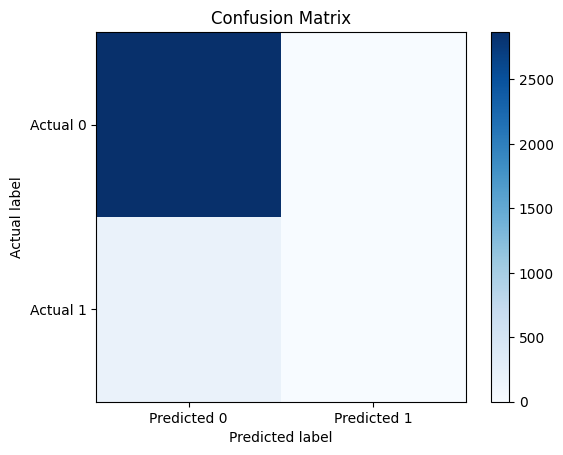

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


The total number of predictions = TP + TN + FP + FN = 5 + 2867 + 0 + 190 = 3062.

Using the formula, the accuracy can be calculated as:

Accuracy = (5 + 2867) / 3062 ≈ 0.9377 (or approximately 93.77%)

So, the accuracy of the model based on the given confusion matrix is approximately 93.77%.